<a href="https://colab.research.google.com/github/ArminD93/cost_livning_dataset/blob/dev/Cost_living.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)



df = pd.read_csv('/content/cost-of-living.csv', low_memory=False)
df.head(3)

,Unnamed: 0,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan","Guadalajara, Mexico","Kathmandu, Nepal","Hanoi, Vietnam","Ho Chi Minh City, Vietnam","Mexico City, Mexico","Rome, Italy","Monterrey, Mexico","Yekaterinburg, Russia","Sarajevo, Bosnia And Herzegovina","Kharkiv, Ukraine","Kiev, Ukraine","Calgary, Canada","Tunis, Tunisia","Edmonton, Canada","Amsterdam, Netherlands","Belgrade, Serbia","Odessa, Ukraine","Paris, France","Eindhoven, Netherlands","Plovdiv, Bulgaria","Thessaloniki, Greece","Ottawa, Canada","Sofia, Bulgaria","Rotterdam, Netherlands","Varna, Bulgaria","Novi Sad, Serbia","Utrecht, Netherlands","Berlin, Germany","Beirut, Lebanon","Austin, TX, United States",...,"Tel Aviv-Yafo, Israel","Timisoara, Romania","Taipei, Taiwan","Kolkata, India","Skopje, Macedonia","Shanghai, China","Bangkok, Thailand","Mumbai, India","Reykjavik, Iceland","Amman, Jordan","Pune, India","Stockholm, Sweden","Buenos Aires, Argentina","Minsk, Belarus","San Jose, Costa Rica","Casablanca, Morocco","Lodz, Poland","Montreal, Canada","Sao Paulo, Brazil","Gothenburg, Sweden","Dublin, Ireland","Moscow, Russia","Santo Domingo, Dominican Republic","Adelaide, Australia","Zurich, Switzerland","Yerevan, Armenia","Manila, Philippines","Brisbane, Australia","Jakarta, Indonesia","Ankara, Turkey","Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
0,"Meal, Inexpensive Restaurant",7.34,4.58,3.06,12.0,4.67,15.0,3.38,3.58,5.27,5.25,1.99,1.94,1.94,4.77,15.0,5.75,5.88,3.57,4.50,5.63,13.75,1.92,13.75,15.0,5.39,5.65,15.0,15.0,5.10,10.0,11.00,6.14,13.0,6.12,4.84,15.0,8.5,8.98,13.48,...,15.54,5.23,3.61,2.53,4.87,4.56,1.78,3.80,17.96,6.34,3.16,11.40,5.99,8.93,6.29,4.45,4.72,10.31,6.58,10.45,15.0,8.80,5.10,11.19,23.12,4.70,3.56,12.38,2.62,3.82,3.75,5.72,3.82,15.0,15.56,10.22,12.43,11.81,2.81,3.59
1,"Meal for 2 People, Mid-range Restaurant, Three...",29.35,15.28,12.22,65.0,20.74,60.0,17.48,22.99,23.73,23.86,11.92,15.52,17.50,23.86,55.0,23.94,29.42,20.42,18.76,22.51,42.97,12.78,48.12,65.0,24.62,20.67,50.0,56.5,20.42,35.0,55.00,25.57,50.0,20.42,17.85,65.0,40.0,53.91,44.92,...,64.75,20.91,24.04,10.76,16.25,26.04,23.74,15.19,109.16,38.02,12.66,66.47,20.97,27.95,42.47,20.63,23.61,44.69,28.51,75.97,60.0,36.69,34.01,40.39,92.46,22.54,17.82,49.54,16.40,15.28,18.76,22.01,11.47,60.0,62.24,49.54,56.55,54.37,14.06,31.45
2,McMeal at McDonalds (or Equivalent Combo Meal),4.40,3.82,3.06,8.0,4.15,8.0,4.51,3.58,4.22,4.25,5.56,3.88,3.87,4.77,8.0,4.31,4.12,4.08,3.75,3.75,6.87,3.19,6.53,8.0,5.09,3.67,8.7,8.0,4.59,6.5,6.87,4.60,8.0,4.08,4.42,8.0,7.0,7.19,7.19,...,12.95,4.18,3.91,3.79,3.25,4.56,5.04,3.80,11.64,6.34,3.16,7.60,4.94,4.49,6.29,5.16,4.25,6.87,5.92,7.60,8.0,4.40,5.10,6.84,12.94,4.60,2.67,7.43,3.28,3.51,3.56,3.67,3.06,8.2,12.97,7.12,7.32,7.15,3.38,5.39


In [0]:
# Ustawienie indeksu:

df.set_index('Unnamed: 0', inplace=True)
df.index

Index(['Meal, Inexpensive Restaurant',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle)', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
       'One-way Ticket (Local Transport)',
       'Chicken Breasts (Boneless, Skinless), (1kg)',
       'Monthly Pass (Regular Price)', 'Gasoline (1 liter)', 'Volkswagen Golf',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Centre',
       

In [0]:
# Wyrzucenie niepotrzebnych wierszy:

df.drop(index=['McMeal at McDonalds (or Equivalent Combo Meal)', 'Domestic Beer (0.5 liter draught)', 'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)', 'Bottle of Wine (Mid-Range)', 
                            'Domestic Beer (0.5 liter bottle)', 'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
               'Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate', 'Beef Round (1kg) (or Equivalent Back Leg Red Meat)'], inplace=True)
df.index

Index(['Meal, Inexpensive Restaurant',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'Water (0.33 liter bottle)', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'One-way Ticket (Local Transport)',
       'Chicken Breasts (Boneless, Skinless), (1kg)',
       'Monthly Pass (Regular Price)', 'Gasoline (1 liter)', 'Volkswagen Golf',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Centre',
       'Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment',
       '1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans)',
       'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)',
       'Fitness Club, Monthly Fee for 1 Adult',
       'Tennis Court Rent (1 Hour on Weekend)',
       'Cinema, Inte

In [0]:
newIndexNames = {
                  'Meal, Inexpensive Restaurant'                                                  :   'Meal_InexpRestaurant',
                  'Meal for 2 People, Mid-range Restaurant, Three-course'                         :   'Meal2People_MidRestaunant_3-course',
                  'Water (0.33 liter bottle)'                                                     :   'Water_0.33l_bottle',
                  'Milk (regular), (1 liter)'                                                     :   'Milk_1l',
                  'Loaf of Fresh White Bread (500g)'                                              :   'LoafofBread_500g',
                  'Eggs (regular) (12)'                                                           :   '12Eggs',
                  'Local Cheese (1kg)'                                                            :   'Cheese_1kg',
                  'Water (1.5 liter bottle)'                                                      :   'Water_1.5l_bottle',  
                  'One-way Ticket (Local Transport)'                                              :   'OneWay_Ticket_LocalTransport',
                  'Chicken Breasts (Boneless, Skinless), (1kg)'                                   :   'ChickenBreasts_1kg',
                  'Monthly Pass (Regular Price)'                                                  :   'MonthlyPass_Regular',
                  'Gasoline (1 liter)'                                                            :   'Gasoline_1l',
                  'Volkswagen Golf'                                                               :   'VolkswagenGolf_car',
                  'Apartment (1 bedroom) in City Centre'                                          :   '1Bed_Apartment_CityCentre',
                  'Apartment (1 bedroom) Outside of Centre'                                       :   '1Bed_Apartment_OutsideofCentre',
                  'Apartment (3 bedrooms) in City Centre'                                         :   '3Bed_Apartment_CityCentre',
                  'Apartment (3 bedrooms) Outside of Centre'                                      :   '3Bed_Apartment_OutsideofCentre',
                  'Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment'      :   'Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment',
                  '1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans)'                 :   '1minOfPrepaidMobileTariffLocal',
                  'Internet (60 Mbps or M)ore, Unlimited Data, Cable/ADSL)'                        :   'Internet',
                  'Fitness Club, Monthly Fee for 1 Adult'                                         :   'FitnessClub_Monthlyfor1Adult',
                  'Tennis Court Rent (1 Hour on Weekend)'                                         :   'Tennis_Court_Rent_1HourWeekend',
                  'Cinema, International Release, 1 Seat'                                         :   'Cinema_1Seat',
                  '1 Pair of Jeans (Levis 501 Or Similar)'                                        :   '1PairOfJeans',
                  '1 Summer Dress in a Chain Store (Zara, H&M, ...)'                              :   '1SummerDress_ChainStore',
                  '1 Pair of Nike Running Shoes (Mid-Range)'                                      :   '1PairNikeRunningShoes',
                  '1 Pair of Men Leather Business Shoes'                                          :   '1PairMenLeatherBusinessShoes',
                  'Price per Square Meter to Buy Apartment in City Centre'                        :   'Apartment_inCityCentre_PricePerm2',
                  'Price per Square Meter to Buy Apartment Outside of Centre'                     :   'Apartment_OutsideOfCentre_PricePerm2',
                  'Average Monthly Net Salary (After Tax)'                                        :   'AvgMonthly_Netto_Salary',
                  'Taxi Start (Normal Tariff)'                                                    :   'Taxi_Start',
                  'Taxi 1km (Normal Tariff)'                                                      :   'Taxi_1km',
                  'Taxi 1hour Waiting (Normal Tariff)'                                            :   'Taxi_1h_Waiting',
                  'Apples (1kg)'                                                                  :   'Apples_1kg',
                  'Oranges (1kg)'                                                                 :   'Oranges_1kg',
                  'Potato (1kg)'                                                                  :   'Potato_1kg',
                  'Lettuce (1 head)'                                                              :   'Lettuce_1head',
                  'Cappuccino (regular)'                                                          :   'Cappuccino_1cup',
                  'Rice (white), (1kg)'                                                           :   'RiceWhite_1kg',
                  'Tomato (1kg)'                                                                  :   'Tomato_1kg',
                  'Banana (1kg)'                                                                  :   'Banana_1kg',
                  'Onion (1kg)'                                                                   :   'Onion_1kg',
                  'Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car)'                      :   'Toyota Corolla_Or_New Car',
                  'Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child'           :   'PreschoolPrivate_MonthlyFor1Child',
                  'International Primary School, Yearly for 1 Child'                              :   'Primary School_YearlyFor1Child'
    
                  }

df.rename(index=newIndexNames, inplace=True)
df.index

Index(['Meal_InexpRestaurant', 'Meal2People_MidRestaunant_3-course',
       'Water_0.33l_bottle', 'Milk_1l', 'LoafofBread_500g', '12Eggs',
       'Cheese_1kg', 'Water_1.5l_bottle', 'OneWay_Ticket_LocalTransport',
       'ChickenBreasts_1kg', 'MonthlyPass_Regular', 'Gasoline_1l',
       'VolkswagenGolf_car', '1Bed_Apartment_CityCentre',
       '1Bed_Apartment_OutsideofCentre', '3Bed_Apartment_CityCentre',
       '3Bed_Apartment_OutsideofCentre',
       'Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment',
       '1minOfPrepaidMobileTariffLocal',
       'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)',
       'FitnessClub_Monthlyfor1Adult', 'Tennis_Court_Rent_1HourWeekend',
       'Cinema_1Seat', '1PairOfJeans', '1SummerDress_ChainStore',
       '1PairNikeRunningShoes', '1PairMenLeatherBusinessShoes',
       'Apartment_inCityCentre_PricePerm2',
       'Apartment_OutsideOfCentre_PricePerm2', 'AvgMonthly_Netto_Salary',
       'Taxi_Start', 'Taxi_1km', 'Taxi_1h_Waiting', '

In [0]:
# Zresetowanie indeksu:

df.reset_index(inplace=True)
df.head()

,Unnamed: 0,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan","Guadalajara, Mexico","Kathmandu, Nepal","Hanoi, Vietnam","Ho Chi Minh City, Vietnam","Mexico City, Mexico","Rome, Italy","Monterrey, Mexico","Yekaterinburg, Russia","Sarajevo, Bosnia And Herzegovina","Kharkiv, Ukraine","Kiev, Ukraine","Calgary, Canada","Tunis, Tunisia","Edmonton, Canada","Amsterdam, Netherlands","Belgrade, Serbia","Odessa, Ukraine","Paris, France","Eindhoven, Netherlands","Plovdiv, Bulgaria","Thessaloniki, Greece","Ottawa, Canada","Sofia, Bulgaria","Rotterdam, Netherlands","Varna, Bulgaria","Novi Sad, Serbia","Utrecht, Netherlands","Berlin, Germany","Beirut, Lebanon","Austin, TX, United States",...,"Tel Aviv-Yafo, Israel","Timisoara, Romania","Taipei, Taiwan","Kolkata, India","Skopje, Macedonia","Shanghai, China","Bangkok, Thailand","Mumbai, India","Reykjavik, Iceland","Amman, Jordan","Pune, India","Stockholm, Sweden","Buenos Aires, Argentina","Minsk, Belarus","San Jose, Costa Rica","Casablanca, Morocco","Lodz, Poland","Montreal, Canada","Sao Paulo, Brazil","Gothenburg, Sweden","Dublin, Ireland","Moscow, Russia","Santo Domingo, Dominican Republic","Adelaide, Australia","Zurich, Switzerland","Yerevan, Armenia","Manila, Philippines","Brisbane, Australia","Jakarta, Indonesia","Ankara, Turkey","Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
0,Meal_InexpRestaurant,7.34,4.58,3.06,12.00,4.67,15.00,3.38,3.58,5.27,5.25,1.99,1.94,1.94,4.77,15.00,5.75,5.88,3.57,4.50,5.63,13.75,1.92,13.75,15.00,5.39,5.65,15.00,15.00,5.10,10.00,11.00,6.14,13.00,6.12,4.84,15.00,8.50,8.98,13.48,...,15.54,5.23,3.61,2.53,4.87,4.56,1.78,3.80,17.96,6.34,3.16,11.40,5.99,8.93,6.29,4.45,4.72,10.31,6.58,10.45,15.00,8.80,5.10,11.19,23.12,4.70,3.56,12.38,2.62,3.82,3.75,5.72,3.82,15.00,15.56,10.22,12.43,11.81,2.81,3.59
1,Meal2People_MidRestaunant_3-course,29.35,15.28,12.22,65.00,20.74,60.00,17.48,22.99,23.73,23.86,11.92,15.52,17.50,23.86,55.00,23.94,29.42,20.42,18.76,22.51,42.97,12.78,48.12,65.00,24.62,20.67,50.00,56.50,20.42,35.00,55.00,25.57,50.00,20.42,17.85,65.00,40.00,53.91,44.92,...,64.75,20.91,24.04,10.76,16.25,26.04,23.74,15.19,109.16,38.02,12.66,66.47,20.97,27.95,42.47,20.63,23.61,44.69,28.51,75.97,60.00,36.69,34.01,40.39,92.46,22.54,17.82,49.54,16.40,15.28,18.76,22.01,11.47,60.00,62.24,49.54,56.55,54.37,14.06,31.45
2,Water_0.33l_bottle,0.53,0.24,0.22,1.89,0.44,1.12,0.18,0.74,0.21,0.51,0.20,0.28,0.26,0.47,0.99,0.54,0.53,0.68,0.29,0.45,1.51,0.28,1.20,1.96,0.92,0.42,2.19,1.99,0.64,0.50,1.18,0.59,1.59,0.54,0.78,1.99,1.73,0.39,1.37,...,1.82,0.83,0.59,0.14,0.76,0.33,0.27,0.17,1.92,0.34,0.18,1.97,0.73,0.49,1.18,0.30,0.79,1.16,0.69,1.76,1.59,0.51,0.46,1.72,3.21,0.34,0.36,1.61,0.26,0.20,0.37,0.52,0.23,2.07,1.71,1.70,1.62,1.68,0.19,0.47
3,Milk_1l,0.98,0.71,0.65,0.96,0.68,1.21,0.84,0.69,0.83,0.87,0.67,1.32,1.21,0.91,1.28,0.91,0.75,0.70,0.85,0.93,1.35,0.39,1.57,1.02,0.79,0.97,1.24,0.93,1.03,1.11,1.44,1.04,0.89,1.02,0.76,0.92,0.80,1.89,0.75,...,1.54,0.92,2.64,0.50,0.84,2.39,1.51,0.68,1.20,1.49,0.63,1.16,0.81,0.68,1.23,0.67,0.55,1.40,0.74,1.10,0.95,1.03,1.03,0.97,1.58,0.82,1.48,0.90,1.24,0.69,0.85,0.85,0.69,0.97,1.43,0.90,1.03,0.90,0.81,0.87
4,LoafofBread_500g,0.71,0.36,0.38,2.27,0.33,1.94,0.51,0.63,0.26,1.35,0.43,0.71,0.66,1.44,1.54,1.51,0.43,0.52,0.41,0.58,1.83,0.10,1.82,1.43,0.42,0.45,1.52,1.09,0.56,0.91,1.94,0.56,1.12,0.51,0.43,1.15,1.34,0.86,2.40,...,2.24,0.68,1.63,0.29,0.47,1.76,0.99,0.41,2.91,0.43,0.44,2.18,1.10,0.56,1.69,0.84,0.61,2.39,1.35,2.32,1.42,0.62,1.23,1.44,2.88,0.43,1.05,1.73,1.11,0.41,0.46,0.49,0.42,1.64,1.54,1.88,1.76,1.85,0.51,1.35


In [0]:
# Szukam wartości z zastosowaniem wyrażeń regularnych:
import re

# Nie chcę się przejmować wielkością znaków - re.IGNORECASE
# .* - dowolna liczba znaków

regex_beverages = re.compile('(bottle|cup|milk)', re.IGNORECASE)
regex_transport = re.compile('(car|transport|taxi|MonthlyPass|gasoline)', re.IGNORECASE)
regex_clothes = re.compile('(pair|shoes|dress|jeans|ChainStore)', re.IGNORECASE)
regex_education = re.compile('school', re.IGNORECASE)
regex_apartament = re.compile('apartment', re.IGNORECASE)
regex_foods = re.compile('(.*[0-9]kg.*|[1-9]g.*|(meal|egg|bread|head))', re.IGNORECASE)
regex_other = re.compile('(salary|internet|fitness|tennis|cinema|mobile)', re.IGNORECASE)

beverages = df['Unnamed: 0'].apply(lambda x: bool(regex_beverages.search(x)))
transport = df['Unnamed: 0'].apply(lambda x: bool(regex_transport.search(x)))
clothes = df['Unnamed: 0'].apply(lambda x: bool(regex_clothes.search(x)))
education = df['Unnamed: 0'].apply(lambda x: bool(regex_education.search(x)))
apartament = df['Unnamed: 0'].apply(lambda x: bool(regex_apartament.search(x)))
foods = df['Unnamed: 0'].apply(lambda x: bool(regex_foods.search(x)))
other = df['Unnamed: 0'].apply(lambda x: bool(regex_other.search(x)))

df[other]

,Unnamed: 0,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan","Guadalajara, Mexico","Kathmandu, Nepal","Hanoi, Vietnam","Ho Chi Minh City, Vietnam","Mexico City, Mexico","Rome, Italy","Monterrey, Mexico","Yekaterinburg, Russia","Sarajevo, Bosnia And Herzegovina","Kharkiv, Ukraine","Kiev, Ukraine","Calgary, Canada","Tunis, Tunisia","Edmonton, Canada","Amsterdam, Netherlands","Belgrade, Serbia","Odessa, Ukraine","Paris, France","Eindhoven, Netherlands","Plovdiv, Bulgaria","Thessaloniki, Greece","Ottawa, Canada","Sofia, Bulgaria","Rotterdam, Netherlands","Varna, Bulgaria","Novi Sad, Serbia","Utrecht, Netherlands","Berlin, Germany","Beirut, Lebanon","Austin, TX, United States",...,"Tel Aviv-Yafo, Israel","Timisoara, Romania","Taipei, Taiwan","Kolkata, India","Skopje, Macedonia","Shanghai, China","Bangkok, Thailand","Mumbai, India","Reykjavik, Iceland","Amman, Jordan","Pune, India","Stockholm, Sweden","Buenos Aires, Argentina","Minsk, Belarus","San Jose, Costa Rica","Casablanca, Morocco","Lodz, Poland","Montreal, Canada","Sao Paulo, Brazil","Gothenburg, Sweden","Dublin, Ireland","Moscow, Russia","Santo Domingo, Dominican Republic","Adelaide, Australia","Zurich, Switzerland","Yerevan, Armenia","Manila, Philippines","Brisbane, Australia","Jakarta, Indonesia","Ankara, Turkey","Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
18,1minOfPrepaidMobileTariffLocal,0.03,0.11,0.09,0.07,0.07,0.18,0.01,0.10,0.03,0.06,0.02,0.06,0.08,0.06,0.18,0.05,0.02,0.12,0.03,0.04,0.19,0.06,0.23,0.18,0.10,0.03,0.19,0.11,0.14,0.44,0.18,0.15,0.13,0.13,0.09,0.15,0.10,0.29,0.09,...,0.04,0.03,0.13,0.01,0.10,0.03,0.05,0.01,0.15,0.05,0.01,0.12,0.13,0.04,0.06,0.13,0.06,0.23,0.37,0.08,0.26,0.03,0.15,0.32,0.26,0.03,0.14,0.18,0.12,0.11,0.03,0.03,0.12,0.23,0.13,0.12,0.32,0.38,0.01,0.11
19,"Internet (60 Mbps or More, Unlimited Data, Cab...",6.96,14.20,12.89,22.31,8.58,28.93,14.77,21.34,15.51,27.53,16.66,9.41,10.42,26.34,29.64,25.84,7.61,22.77,5.57,5.11,54.67,17.03,52.56,40.47,21.45,5.73,27.15,36.18,11.57,30.22,43.85,10.38,38.20,11.20,19.30,35.06,29.08,49.74,55.38,...,24.84,7.53,20.55,7.72,15.11,14.26,20.69,9.09,59.63,38.86,11.70,27.98,24.79,12.84,65.30,31.63,12.53,42.59,24.20,30.42,54.01,6.79,50.03,41.95,48.71,14.09,45.47,47.06,26.47,14.11,4.44,7.96,12.93,43.43,24.16,43.28,43.78,43.51,16.57,36.77
20,FitnessClub_Monthlyfor1Adult,26.27,25.10,20.64,34.54,26.64,66.62,26.19,20.70,30.43,24.59,24.02,24.06,21.48,49.56,57.77,34.28,35.51,26.50,18.58,20.92,40.58,22.10,38.60,36.67,24.61,20.84,39.98,24.24,24.85,31.30,40.21,24.34,28.80,22.19,22.89,28.05,26.39,65.66,34.53,...,67.82,25.30,40.35,15.18,22.03,44.90,61.07,24.63,54.44,56.38,16.08,37.83,25.90,31.85,53.68,24.49,26.35,23.04,25.41,32.03,40.22,41.55,22.49,34.05,76.33,43.14,43.97,40.03,38.09,20.81,17.16,27.49,23.40,26.11,71.27,46.28,39.32,47.37,19.58,40.91
21,Tennis_Court_Rent_1HourWeekend,18.33,15.66,11.67,24.72,12.10,22.96,7.07,9.38,16.73,9.71,8.50,6.68,6.82,16.17,16.81,10.37,16.31,10.58,8.27,11.48,16.06,6.44,13.33,25.64,12.13,9.45,20.05,19.11,11.18,9.98,16.84,11.08,19.25,10.43,6.02,20.62,19.23,24.45,14.60,...,16.66,10.45,12.08,7.07,8.51,11.80,8.37,8.89,33.00,26.48,5.09,26.69,9.29,15.41,24.90,15.63,10.48,11.17,31.80,20.70,15.94,25.26,13.09,1.42,32.90,11.31,5.35,13.15,9.24,9.50,8.84,17.31,8.21,16.94,16.60,14.14,11.99,13.50,7.52,16.73
22,Cinema_1Seat,5.14,3.82,3.06,14.00,5.19,10.00,4.51,2.55,3.69,3.58,3.06,3.69,3.50,3.82,8.50,3.59,3.68,3.57,3.75,4.31,9.62,3.19,9.62,12.00,4.24,4.52,11.00,12.00,5.61,8.00,9.62,6.14,12.00,6.12,3.40,11.00,10.00,8.98,10.78,...,10.36,5.23,9.02,3.16,4.06,7.81,7.42,3.80,11.57,10.14,3.54,12.82,5.99,4.04,5.50,5.63,5.90,8.94,7.68,12.34,12.00,6.60,5.10,9.32,16.64,4.70,5.35,9.29,3.28,3.06,3.75,4.40,3.06,11.00,10.37,12.38,11.19,12.43,3.6

In [0]:
# Wstawiam kolumnę Category, jak najbliżej z lewej strony:

df.insert(loc=1, column="Category", value=0)
df.head(3)

,Unnamed: 0,Category,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan","Guadalajara, Mexico","Kathmandu, Nepal","Hanoi, Vietnam","Ho Chi Minh City, Vietnam","Mexico City, Mexico","Rome, Italy","Monterrey, Mexico","Yekaterinburg, Russia","Sarajevo, Bosnia And Herzegovina","Kharkiv, Ukraine","Kiev, Ukraine","Calgary, Canada","Tunis, Tunisia","Edmonton, Canada","Amsterdam, Netherlands","Belgrade, Serbia","Odessa, Ukraine","Paris, France","Eindhoven, Netherlands","Plovdiv, Bulgaria","Thessaloniki, Greece","Ottawa, Canada","Sofia, Bulgaria","Rotterdam, Netherlands","Varna, Bulgaria","Novi Sad, Serbia","Utrecht, Netherlands","Berlin, Germany","Beirut, Lebanon",...,"Tel Aviv-Yafo, Israel","Timisoara, Romania","Taipei, Taiwan","Kolkata, India","Skopje, Macedonia","Shanghai, China","Bangkok, Thailand","Mumbai, India","Reykjavik, Iceland","Amman, Jordan","Pune, India","Stockholm, Sweden","Buenos Aires, Argentina","Minsk, Belarus","San Jose, Costa Rica","Casablanca, Morocco","Lodz, Poland","Montreal, Canada","Sao Paulo, Brazil","Gothenburg, Sweden","Dublin, Ireland","Moscow, Russia","Santo Domingo, Dominican Republic","Adelaide, Australia","Zurich, Switzerland","Yerevan, Armenia","Manila, Philippines","Brisbane, Australia","Jakarta, Indonesia","Ankara, Turkey","Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
0,Meal_InexpRestaurant,0,7.34,4.58,3.06,12.00,4.67,15.00,3.38,3.58,5.27,5.25,1.99,1.94,1.94,4.77,15.00,5.75,5.88,3.57,4.50,5.63,13.75,1.92,13.75,15.00,5.39,5.65,15.00,15.00,5.10,10.0,11.00,6.14,13.00,6.12,4.84,15.00,8.50,8.98,...,15.54,5.23,3.61,2.53,4.87,4.56,1.78,3.80,17.96,6.34,3.16,11.40,5.99,8.93,6.29,4.45,4.72,10.31,6.58,10.45,15.00,8.80,5.10,11.19,23.12,4.70,3.56,12.38,2.62,3.82,3.75,5.72,3.82,15.00,15.56,10.22,12.43,11.81,2.81,3.59
1,Meal2People_MidRestaunant_3-course,0,29.35,15.28,12.22,65.00,20.74,60.00,17.48,22.99,23.73,23.86,11.92,15.52,17.50,23.86,55.00,23.94,29.42,20.42,18.76,22.51,42.97,12.78,48.12,65.00,24.62,20.67,50.00,56.50,20.42,35.0,55.00,25.57,50.00,20.42,17.85,65.00,40.00,53.91,...,64.75,20.91,24.04,10.76,16.25,26.04,23.74,15.19,109.16,38.02,12.66,66.47,20.97,27.95,42.47,20.63,23.61,44.69,28.51,75.97,60.00,36.69,34.01,40.39,92.46,22.54,17.82,49.54,16.40,15.28,18.76,22.01,11.47,60.00,62.24,49.54,56.55,54.37,14.06,31.45
2,Water_0.33l_bottle,0,0.53,0.24,0.22,1.89,0.44,1.12,0.18,0.74,0.21,0.51,0.20,0.28,0.26,0.47,0.99,0.54,0.53,0.68,0.29,0.45,1.51,0.28,1.20,1.96,0.92,0.42,2.19,1.99,0.64,0.5,1.18,0.59,1.59,0.54,0.78,1.99,1.73,0.39,...,1.82,0.83,0.59,0.14,0.76,0.33,0.27,0.17,1.92,0.34,0.18,1.97,0.73,0.49,1.18,0.30,0.79,1.16,0.69,1.76,1.59,0.51,0.46,1.72,3.21,0.34,0.36,1.61,0.26,0.20,0.37,0.52,0.23,2.07,1.71,1.70,1.62,1.68,0.19,0.47


In [0]:
# Dodanie kategorii:

df.loc[beverages, 'Category'] = 'beverages'
df.loc[foods, 'Category'] = 'foods'
df.loc[transport, 'Category'] = 'transport'
df.loc[clothes, 'Category'] = 'clothes'
df.loc[education, 'Category'] = 'education'
df.loc[apartament, 'Category'] = 'apartament'
df.loc[other, 'Category'] = 'other'

df.head()

,Unnamed: 0,Category,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan","Guadalajara, Mexico","Kathmandu, Nepal","Hanoi, Vietnam","Ho Chi Minh City, Vietnam","Mexico City, Mexico","Rome, Italy","Monterrey, Mexico","Yekaterinburg, Russia","Sarajevo, Bosnia And Herzegovina","Kharkiv, Ukraine","Kiev, Ukraine","Calgary, Canada","Tunis, Tunisia","Edmonton, Canada","Amsterdam, Netherlands","Belgrade, Serbia","Odessa, Ukraine","Paris, France","Eindhoven, Netherlands","Plovdiv, Bulgaria","Thessaloniki, Greece","Ottawa, Canada","Sofia, Bulgaria","Rotterdam, Netherlands","Varna, Bulgaria","Novi Sad, Serbia","Utrecht, Netherlands","Berlin, Germany","Beirut, Lebanon",...,"Tel Aviv-Yafo, Israel","Timisoara, Romania","Taipei, Taiwan","Kolkata, India","Skopje, Macedonia","Shanghai, China","Bangkok, Thailand","Mumbai, India","Reykjavik, Iceland","Amman, Jordan","Pune, India","Stockholm, Sweden","Buenos Aires, Argentina","Minsk, Belarus","San Jose, Costa Rica","Casablanca, Morocco","Lodz, Poland","Montreal, Canada","Sao Paulo, Brazil","Gothenburg, Sweden","Dublin, Ireland","Moscow, Russia","Santo Domingo, Dominican Republic","Adelaide, Australia","Zurich, Switzerland","Yerevan, Armenia","Manila, Philippines","Brisbane, Australia","Jakarta, Indonesia","Ankara, Turkey","Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
0,Meal_InexpRestaurant,foods,7.34,4.58,3.06,12.00,4.67,15.00,3.38,3.58,5.27,5.25,1.99,1.94,1.94,4.77,15.00,5.75,5.88,3.57,4.50,5.63,13.75,1.92,13.75,15.00,5.39,5.65,15.00,15.00,5.10,10.00,11.00,6.14,13.00,6.12,4.84,15.00,8.50,8.98,...,15.54,5.23,3.61,2.53,4.87,4.56,1.78,3.80,17.96,6.34,3.16,11.40,5.99,8.93,6.29,4.45,4.72,10.31,6.58,10.45,15.00,8.80,5.10,11.19,23.12,4.70,3.56,12.38,2.62,3.82,3.75,5.72,3.82,15.00,15.56,10.22,12.43,11.81,2.81,3.59
1,Meal2People_MidRestaunant_3-course,foods,29.35,15.28,12.22,65.00,20.74,60.00,17.48,22.99,23.73,23.86,11.92,15.52,17.50,23.86,55.00,23.94,29.42,20.42,18.76,22.51,42.97,12.78,48.12,65.00,24.62,20.67,50.00,56.50,20.42,35.00,55.00,25.57,50.00,20.42,17.85,65.00,40.00,53.91,...,64.75,20.91,24.04,10.76,16.25,26.04,23.74,15.19,109.16,38.02,12.66,66.47,20.97,27.95,42.47,20.63,23.61,44.69,28.51,75.97,60.00,36.69,34.01,40.39,92.46,22.54,17.82,49.54,16.40,15.28,18.76,22.01,11.47,60.00,62.24,49.54,56.55,54.37,14.06,31.45
2,Water_0.33l_bottle,beverages,0.53,0.24,0.22,1.89,0.44,1.12,0.18,0.74,0.21,0.51,0.20,0.28,0.26,0.47,0.99,0.54,0.53,0.68,0.29,0.45,1.51,0.28,1.20,1.96,0.92,0.42,2.19,1.99,0.64,0.50,1.18,0.59,1.59,0.54,0.78,1.99,1.73,0.39,...,1.82,0.83,0.59,0.14,0.76,0.33,0.27,0.17,1.92,0.34,0.18,1.97,0.73,0.49,1.18,0.30,0.79,1.16,0.69,1.76,1.59,0.51,0.46,1.72,3.21,0.34,0.36,1.61,0.26,0.20,0.37,0.52,0.23,2.07,1.71,1.70,1.62,1.68,0.19,0.47
3,Milk_1l,beverages,0.98,0.71,0.65,0.96,0.68,1.21,0.84,0.69,0.83,0.87,0.67,1.32,1.21,0.91,1.28,0.91,0.75,0.70,0.85,0.93,1.35,0.39,1.57,1.02,0.79,0.97,1.24,0.93,1.03,1.11,1.44,1.04,0.89,1.02,0.76,0.92,0.80,1.89,...,1.54,0.92,2.64,0.50,0.84,2.39,1.51,0.68,1.20,1.49,0.63,1.16,0.81,0.68,1.23,0.67,0.55,1.40,0.74,1.10,0.95,1.03,1.03,0.97,1.58,0.82,1.48,0.90,1.24,0.69,0.85,0.85,0.69,0.97,1.43,0.90,1.03,0.90,0.81,0.87
4,LoafofBread_500g,foods,0.71,0.36,0.38,2.27,0.33,1.94,0.51,0.63,0.26,1.35,0.43,0.71,0.66,1.44,1.54,1.51,0.43,0.52,0.41,0.58,1.83,0.10,1.82,1.43,0.42,0.45,1.52,1.09,0.56,0.91,1.94,0.56,1.12,0.51,0.43,1.15,1.34,0.86,...,2.24,0.68,1.63,0.29,0.47,1.76,0.99,0.41,2.91,0.43,0.44,2.18,1.10,0.56,1.69,0.84,0.61,2.39,1.35,2.32,1.42,0.62,1.23,1.44,2.88,0.43,1.05,1.73,1.11,0.41,0.46,0.49,0.42,1.64,1.54,1.88,1.76,1.85,0.51,1.35


In [0]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Columns: 162 entries, Unnamed: 0 to Quito, Ecuador
dtypes: float64(160), object(2)
memory usage: 64.1 KB


In [0]:
# Ile jest wierszy w każdej kolumnie?
df.count()

Unnamed: 0                  45
Category                    45
Saint Petersburg, Russia    45
Istanbul, Turkey            45
Izmir, Turkey               45
                            ..
Melbourne, Australia        45
Perth, Australia            45
Sydney, Australia           45
Alexandria, Egypt           45
Quito, Ecuador              45
Length: 162, dtype: int64

In [0]:
# Zmiana na multiindex:

df.set_index(['Category', 'Unnamed: 0'],inplace=True)
df.sort_index(inplace=True)
df.head()

Saint Petersburg, Russia  ...  Quito, Ecuador
Category   Unnamed: 0                                                      ...                
apartament 1Bed_Apartment_CityCentre                               524.45  ...          369.07
           1Bed_Apartment_OutsideofCentre                          344.27  ...          221.89
           3Bed_Apartment_CityCentre                              1012.53  ...          680.28
           3Bed_Apartment_OutsideofCentre                          615.19  ...          447.51
           Apartment_OutsideOfCentre_PricePerm2                   1507.70  ...          947.32

[5 rows x 160 columns]

In [0]:
# Transponowanie obiektu data frame:
df_transponed = df.transpose()
df_transponed.head()

Category                                apartament  ...          transport
Unnamed: 0               1Bed_Apartment_CityCentre  ... VolkswagenGolf_car
Saint Petersburg, Russia                    524.45  ...           19289.39
Istanbul, Turkey                            291.55  ...           24443.15
Izmir, Turkey                               212.22  ...           24443.15
Helsinki, Finland                           986.93  ...           22000.00
Chisinau, Moldova                           244.49  ...           16335.12

[5 rows x 45 columns]

In [0]:
# Zresetowanie indeksu:
df_transponed.reset_index(inplace=True)
df_transponed.head()

Category                       index  ...          transport
Unnamed: 0                            ... VolkswagenGolf_car
0           Saint Petersburg, Russia  ...           19289.39
1                   Istanbul, Turkey  ...           24443.15
2                      Izmir, Turkey  ...           24443.15
3                  Helsinki, Finland  ...           22000.00
4                  Chisinau, Moldova  ...           16335.12

[5 rows x 46 columns]

In [0]:
# Rozdzielenie nazw państw od nazw miast:

df_transponed[['City', 'Country']] = df_transponed['index'].str.split(', ', 1, expand=True)
df_transponed.head()

Category                       index  ...  Country
Unnamed: 0                            ...         
0           Saint Petersburg, Russia  ...   Russia
1                   Istanbul, Turkey  ...   Turkey
2                      Izmir, Turkey  ...   Turkey
3                  Helsinki, Finland  ...  Finland
4                  Chisinau, Moldova  ...  Moldova

[5 rows x 48 columns]

In [0]:
# Opuszczenie kolumny, gdzie razem znajdowały się Państwa i miasta:

df_transponed = df_transponed.drop(columns=['index'])
df_transponed.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


Category                  apartament  ...  Country
Unnamed: 0 1Bed_Apartment_CityCentre  ...         
0                             524.45  ...   Russia
1                             291.55  ...   Turkey
2                             212.22  ...   Turkey
3                             986.93  ...  Finland
4                             244.49  ...  Moldova

[5 rows x 47 columns]

In [0]:
# Utworzenie mulitindexu:

df_transponed.set_index(['Country','City'],inplace=True)
df_transponed.sort_index(inplace=True)
df_transponed.head()

Category                                      apartament  ...          transport
Unnamed: 0                     1Bed_Apartment_CityCentre  ... VolkswagenGolf_car
Country           City                                    ...                   
AZ, United States Phoenix                        1092.25  ...           19156.78
Albania           Tirana                          296.37  ...           16413.03
Argentina         Buenos Aires                    245.13  ...           16200.77
Armenia           Yerevan                         320.04  ...           16043.44
Australia         Adelaide                        817.81  ...           15534.80

[5 rows x 45 columns]

In [0]:
# Utworzenie obiektu data frame, gdzie będą przechowywane infomracje o apartamentach:

apartament = df_transponed['apartament']
apartament.head()

,Unnamed: 0,1Bed_Apartment_CityCentre,1Bed_Apartment_OutsideofCentre,3Bed_Apartment_CityCentre,3Bed_Apartment_OutsideofCentre,Apartment_OutsideOfCentre_PricePerm2,Apartment_inCityCentre_PricePerm2,Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment
Country,City,,,,,,,
"AZ, United States",Phoenix,1092.25,824.80,1657.74,1317.96,1403.23,2150.04,161.50
Albania,Tirana,296.37,175.58,578.83,326.01,726.22,1650.37,68.27
Argentina,Buenos Aires,245.13,197.02,436.43,334.47,2208.84,2865.01,68.07
Armenia,Yerevan,320.04,170.55,664.25,313.63,714.57,1383.05,60.06
Australia,Adelaide,817.81,601.79,1369.39,971.70,1715.15,2482.56,119.44


In [0]:
apartament.index

MultiIndex([(   'AZ, United States',          'Phoenix'),
            (             'Albania',           'Tirana'),
            (           'Argentina',     'Buenos Aires'),
            (             'Armenia',          'Yerevan'),
            (           'Australia',         'Adelaide'),
            (           'Australia',         'Brisbane'),
            (           'Australia',        'Melbourne'),
            (           'Australia',            'Perth'),
            (           'Australia',           'Sydney'),
            (             'Austria',           'Vienna'),
            ...
            (             'Ukraine',             'Lviv'),
            (             'Ukraine',           'Odessa'),
            ('United Arab Emirates',        'Abu Dhabi'),
            ('United Arab Emirates',            'Dubai'),
            (      'United Kingdom',           'London'),
            (             'Uruguay',       'Montevideo'),
            (          'Uzbekistan',         'Tashkent')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, '1Bed apartment in city centre')

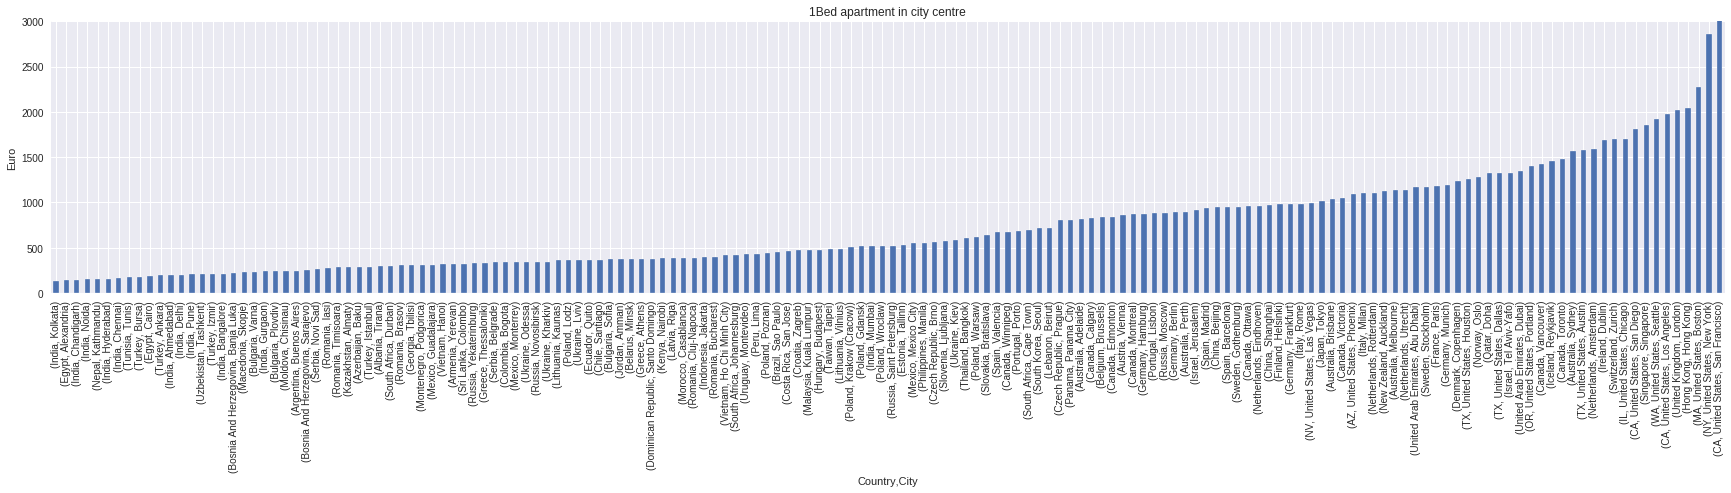

In [0]:
# Posortowanie wartości według kolumny Bed_Apartment_CityCentre:

apartament.sort_values(by='1Bed_Apartment_CityCentre', inplace=True)

# Ceny mieszkań, 1 pokojowe, w różnych miastach na Świecie:

plt.style.use('seaborn')
apartament['1Bed_Apartment_CityCentre'].plot(figsize=(30,5), ylim=[0,3000], kind ='bar')
plt.ylabel('Euro')
plt.title('1Bed apartment in city centre')

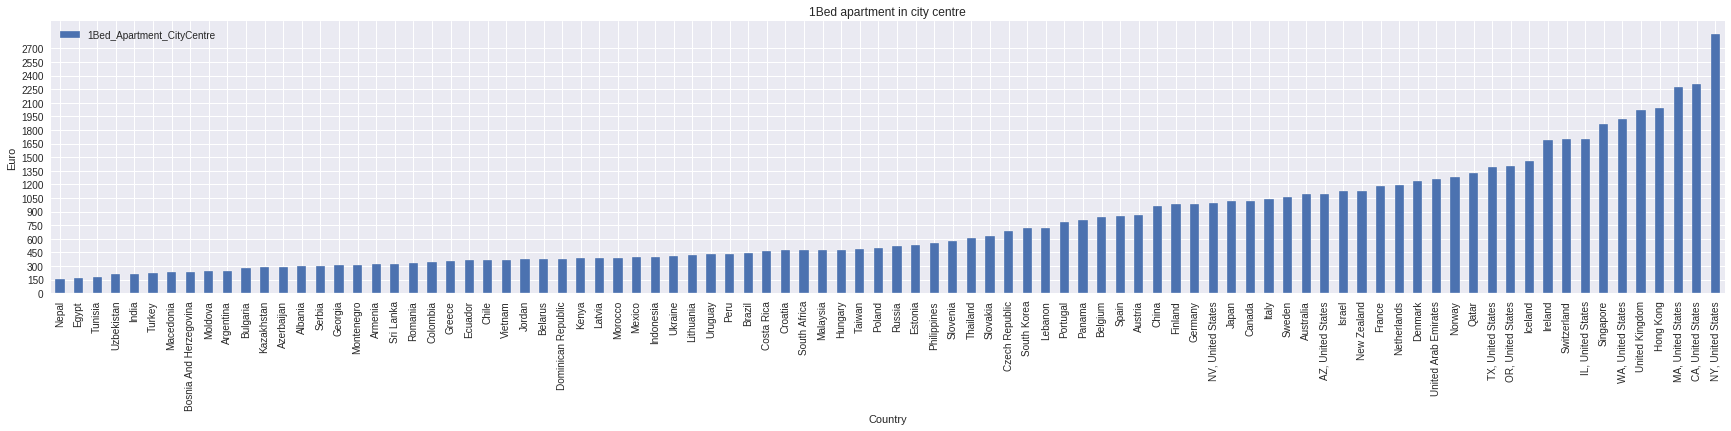

In [0]:
apartament.reset_index(inplace=True)
apartament.set_index(['Country'],inplace=True)

apartament_country_groups = apartament.groupby(by='Country')

Country_1Bed_cityCentre_mean = apartament_country_groups.agg({'1Bed_Apartment_CityCentre' : 'mean'})

# Posortowanie wartości:
Country_1Bed_cityCentre_mean.sort_values(by='1Bed_Apartment_CityCentre', inplace=True)

plt.style.use('seaborn')

Country_1Bed_cityCentre_mean.plot(figsize=(30,5), kind ='bar')
plt.yticks(np.arange(0, 2750, step=150))
plt.ylabel('Euro')
plt.title('1Bed apartment in city centre')


apartament.reset_index(inplace=True)
apartament.set_index(['Country','City'],inplace=True)

In [0]:
other = df_transponed['other']
salary_netto_avg = other['AvgMonthly_Netto_Salary']
salary_netto_avg['Poland'].sort_values(ascending=False)

City
Warsaw             979.42
Gdansk             865.09
Krakow (Cracow)    855.87
Wroclaw            848.11
Poznan             791.94
Lodz               689.44
Name: AvgMonthly_Netto_Salary, dtype: float64

In [0]:
import requests
import urllib.request
from bs4 import BeautifulSoup

# Pobieranie nazw regionów ze strony, gdzie znajdują się dane wykorzystane w projekcie.
class World:

  def __init__(self, country):
    self.country = country
    self.region_links = []
    self.region_names = []
    self.subregion_names = []
    self.subregion_links = []
    self.region_dict = {}

  def findRegionLink(self):
    page = 'https://www.numbeo.com/cost-of-living/prices_by_city.jsp?itemId=101&itemId=100&itemId=228&itemId=224&itemId=60&itemId=66&itemId=64&itemId=62&itemId=110&itemId=118&itemId=121&itemId=14&itemId=19&itemId=17&itemId=15&itemId=11&itemId=16&itemId=113&itemId=9&itemId=12&itemId=8&itemId=119&itemId=111&itemId=112&itemId=115&itemId=116&itemId=13&itemId=27&itemId=26&itemId=29&itemId=28&itemId=114&itemId=6&itemId=4&itemId=5&itemId=3&itemId=2&itemId=1&itemId=7&itemId=105&itemId=106&itemId=44&itemId=40&itemId=42&itemId=24&itemId=20&itemId=18&itemId=109&itemId=108&itemId=107&itemId=206&itemId=25&itemId=32&itemId=30&itemId=33&displayCurrency=EUR'
    response = requests.get(page)
    soup = BeautifulSoup(response.content, 'html.parser')
    regions = soup.find_all('a', class_="ui-state-default region_link")
    for data in regions:
      self.region_names.append(data.text)
      self.region_links.append(data.get('href'))

  def findSubregion(self):
    for subregion in self.region_links:
      page = subregion
      response = requests.get(page)
      soup = BeautifulSoup(response.content, 'html.parser')
      subregions = soup.find_all('a', class_="ui-state-default region_link")
      for data in subregions:
        self.subregion_names.append(data.text)
        self.subregion_links.append(data.get('href'))

  def CreateRegionDict(self):
    self.region_dict = dict(zip(self.region_names, self.region_links))  
    self.subregion_dict = dict(zip(self.subregion_names, self.subregion_links))
    self.region_dict.update(self.subregion_dict)
 
  def findRegion(self):
    print('Szukam nazwy regionu dla: {}'.format(self.country))
    for key in self.region_dict:
      page = self.region_dict[key]
      response = requests.get(page)
      soup = BeautifulSoup(response.content, 'html.parser')
      country_set = soup.find_all('td', text = re.compile(self.country))
      for data in country_set:
        print('city: {}, country: {}'.format(data.text, key))
       

In [2]:
region = World('Poland')

region.findRegionLink()
region.findSubregion()
region.CreateRegionDict()
region.findRegion()

Szukam nazwy regionu dla: Poland
city: Krakow (Cracow), Poland, country: Europe
city: Gdansk, Poland, country: Europe
city: Lodz, Poland, country: Europe
city: Poznan, Poland, country: Europe
city: Warsaw, Poland, country: Europe
city: Wroclaw, Poland, country: Europe
city: Krakow (Cracow), Poland, country: Eastern Europe
city: Gdansk, Poland, country: Eastern Europe
city: Lodz, Poland, country: Eastern Europe
city: Poznan, Poland, country: Eastern Europe
city: Warsaw, Poland, country: Eastern Europe
city: Wroclaw, Poland, country: Eastern Europe
